### Gather Tutorial

This tutorial is simple way to intoduce you with the Gather class. Also, it tell you about attributes and some helpful methods. <br>
You rescue disclose the Gather and Survey classes dependence. It is for that reason I highly recomend to examine the [Survey Tutorial](#link) first. <br>
After studying of the Gather Tutorial you could create the Gather object, know about it structure and could make the base seismic data processing.

Tutorial reading takes N minutes.

### Content

[Intro](#Intro) <br>
[Starting](#Starting) <br>
[Attributes](#Attributes) <br>
[General Methods](#General-Methods)<br>
[Normalization Methods](#Normalization-Methods) <br>
[Muting](#Muting) <br>
[Conclusion](#Conclusion) <br>

In [1]:
import sys # delete after finish
sys.path.append('..') # delete after finish

from seismicpro import Survey
import matplotlib.pyplot as plt

### Intro

We use Survey class for make simple image of SEG-Y file. This image don't contain any trace data, only trace headers.
For trace data extraction we use the Gather class.

Gather class load needful information about SEG-Y file from Survey class, such as headers, path to seg-y file etc. After load the trace data from the SEG-Y file.
Gather load trace data only for indicated `header_index` value. That's important point, because the header_index specify when the Survey class are created.

Why we dont load trace data with Survey class?
SEG-Y files could be very-very huge. Better way is to work with the meaningful chunk. That's what makes Gather class.

### Starting
You will get to know two methods of the creation a Gather class example and learn about Gather structure.

We need to create the Survey class first. All same as in the Survey tutorial.

In [2]:
sgy_path = './data/small_survey.sgy'
header_cols = ["TraceNumber", "offset", 'CDP'] # порезать до необходимого минимума
survey = Survey(sgy_path, header_index='FieldRecord', header_cols=header_cols)

1


We specified `header_cols` as list of the trace headers.
`header_index` also could received list of the trace headers.

#### get_gather
main method for create the Gather object.

To create the Gather with `get_gather` method we need specify `header_index`'s value. `header_index` is FieldRecord in our case. <br>
Traces data with that trace header value will be extracted only.

Let's see what unique value of `header_index` the Survey has.

In [3]:
survey.headers.index.drop_duplicates()

Int64Index([111916, 111917, 111918, 111919, 111920], dtype='int64', name='FieldRecord')

Now choise one of them and specify it in `get_gather` method. 

In [4]:
gather = survey.get_gather(index=111918)

What's happend?
`get_gather` load all traces with `FieldRecord` (Survey's `header_index`) equal to 111918 (specified in `get_gather`).

Let's see information about created gather with `info()` method.

In [5]:
gather.info()


Parent survey path:          ./data/small_survey.sgy
Parent survey name:          small_survey

Number of traces:            1728
Trace length:                3000 samples
Sample rate:                 2.0 ms
Times range:                 [0.0 ms, 5998.0 ms]
Offsets range:               [79 m, 4914 m]

Index name(s):               FieldRecord
Index value:                 111918
Gather sorting:              None

Gather statistics:
Number of dead traces:       3
mean | std:                        0.00 | 0.51      
 min | max:                      -30.30 | 21.94     
 q01 | q99:                       -1.59 | 1.60      



We see that Gather crated from the Survey named 'small_survey' and based on SEG-Y files located at './data/small_survey.sgy'.

Gather object contain 1728 traces with 3000 samples collecting with 2 ms intervals. Itervals range (or Times range) from 0 ms to 5998 ms. <br>
All of 1728 traces have offset range from 79 to 4914 meters.

Traces in `Gather` indexed by `FieldRecord` and have the FieldRecord value is 111918 only. Gather not sorted. <br>

Gather statistics shows common information about all trace data loaded by the Gather and auto calculated when `info()` called.
Gather have 3 dead trace. It's trace with alike value only.

<b> Notes </b>
If Gather created from the Survey with limits then will be loading only part of trace.

#### samle_gather

`sample_gather` randomly choose one of `header_index` value and create the Gather containing all traces where `header_index` is equal to chosen value.

In [ ]:
gather = survey.sample_gather()
gather.info() # maybe remove this string is good idea

You could see difference between Gathers created with `get_gather` and `sample_gather` methods. Key diff is `Index value`.

Hope you could freely create the Gather now.

### Attributes

Let discuss about most useful attributes of Gather class

<b>`headers`</b> - `pandas.Dataframe` containing the trace headers we specified when creating the `Survey`. In contrast with Survey the Gather contain headers with included trace only.

In [6]:
gather.headers

,offset,CDP,TraceNumber,TRACE_SEQUENCE_FILE
FieldRecord,,,,
111918,3266,2057118,326,8062
111918,3274,2128822,1722,8070
111918,3274,2128691,1591,8069
111918,3273,2049219,239,8068
111918,3273,2049174,194,8067
...,...,...,...,...
111918,2276,2073078,662,7483
111918,2276,2073051,635,7482
111918,2275,2128802,1702,7481


`headers` Dataframe indexed by `FieldRecord`. Indexing of `headers` specified when Survey created and cann't be changed via the Gather.

`TRACE_SEQUENCE_FILE` added to headers automatically when the Survey is created and point at sequence number of trace in SEG-Y file.  /// убрать в Survey?

<b>`data`</b> - `numpy.array` containing the trace data of all traces in Gather.

In [7]:
gather.data

array([[ 1.4331881e-06,  1.0170324e-06, -5.3215190e-06, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 5.5239143e-06,  2.2677312e-05,  2.0792519e-05, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-3.2445841e-06, -1.4343628e-05, -1.9693107e-05, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  4.4375739e-09, -1.4841646e-07, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-1.5269310e-05, -3.3778138e-04, -7.4959965e-04, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.3256914e-05,  1.9857907e-05,  1.4473521e-05, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

You could check shape of the `data` array and make certain that shape of array is (`Number of traces`, `Trace length`)

In [8]:
gather.data.shape

(1728, 3000)

<b>`samples`</b> - array of times when the trace record is done, ms

In [9]:
gather.samples

array([0.000e+00, 2.000e+00, 4.000e+00, ..., 5.994e+03, 5.996e+03,
       5.998e+03], dtype=float32)

<b>`sample_rate` </b> - sample interval for each trace, ms

In [10]:
gather.sample_rate

2.0

We learned about the main attributes of Gather class

`mask` - пропущено в данном туториале, т.к. использует в задачах пикировки, которая не прописывается в данном туториале.

### General Methods

We talk about common methods in this block.

#### <i>plot </i>

plot methods uses for vizualization trace data information. Now we realize gray color map only.

In [ ]:
gather.plot()

Along the Y-axis we shows samples. Along the X-axis we shows trace number. <br>
Gray color map means that bigger value is black, lower is white.

///
Метод простой, поэтому я скуп на слова.
Что хотелось бы видеть. Шкалу значений справа от графика, выбор colormap, возможность указания по осям других значений. например перевести samples из штук в ms.

#### <i>sort </i>

sort the traces in the Gather by `headers` value.<br>
`sort` works in ascending order always.

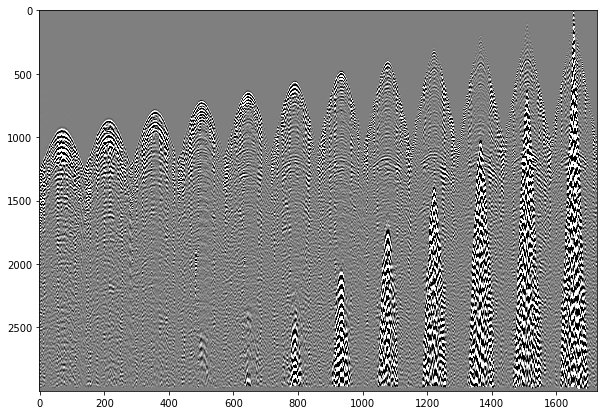

In [12]:
gather = survey.sample_gather().sort(by='CDP') # будем добавлять сортировку по убыванию? стоит ли засорять issue такоё херней?
gather.plot()

<b>Notes</b> `sort` is inplace method. It's mean that `gather.data` changes trace order.

Also, the Gather attribute `sort_by` now shows the header used in sorting.

In [15]:
gather.sort_by

'CDP'

#### <i>copy </i>

make the gather copy.

Most methods work inplace and change the trace data. Good practice to keep Gather's data safe is make a copy and work with copied gather.

Now we have gather example which we sorted by CDP in the sort block. We will make a copy of this gather and sort the original Gather by `offset`.

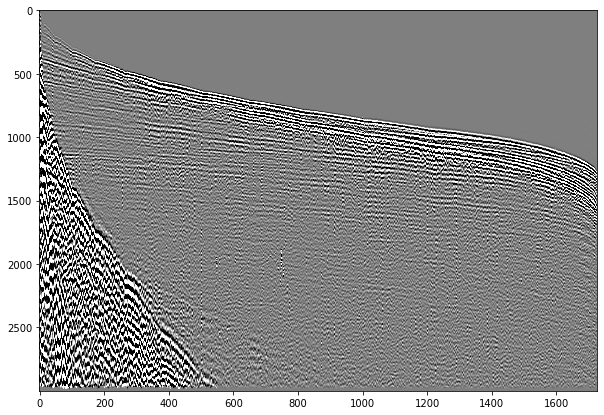

In [16]:
gather_copy = gather.copy()
gather.sort(by='offset')
gather.plot()

Now plot the copied Gather and shows that copied Gather still sorted by `CDP`.

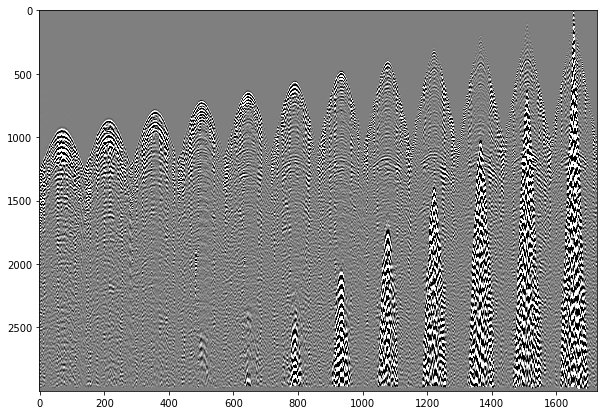

In [17]:
gather_copy.plot()

Hereinafter we will often use copy methods. Hope you will too.

#### <i>dump </i>

save the `Gather` as file in SEG-Y format on the disk.

In [18]:
gather.dump(path='./data/', name='test_gather') 

In [21]:
test_survey = Survey('./data/test_gather.sgy', header_index='FieldRecord', header_cols='all')

1


In [ ]:
survey = Survey(sgy_path, header_index='FieldRecord', header_cols=header_cols)

Tell about `name` and `copy_header` params

### Normalization Methods

возможно переименовать. Например Data Processing

#### <i>scale_standard </i>

Приведение значений трасс к среднему 0 и дисперсии 1

All methods works inplace. I use copy to show you how methods work on the base `Gather`.

In [ ]:
gather_scaled = gather.copy()

gather_scaled.scale_standard()
print(f'Mean of all trace is {gather_scaled.data.mean():.2f}')
print(f'Standart deviation of all trace is {gather_scaled.data.std():.2f}')

In [ ]:
_ = plt.hist(gather_scaled.data.ravel(), bins=20)

In [ ]:
gather_scaled = gather.copy()
survey.collect_stats()
gather_scaled.scale_standard(use_global=True)
_ = plt.hist(gather_scaled.data.ravel(), bins=21)

#### <i>scale_maxabs </i>gather.scale_standard()
gather.info()

In [ ]:
gather_scaled = gather.copy()

gather_scaled.scale_maxabs()
print(f'Min of all trace is {gather_scaled.data.min():.2f}')
print(f'Max of all trace is {gather_scaled.data.max():.2f}')

In [ ]:
_ = plt.hist(gather_scaled.data.ravel(), bins=21)

In [ ]:
gather_scaled = gather.copy()
gather_scaled.scale_maxabs(q_min=0.01, q_max=0.99)
_ = plt.hist(gather_scaled.data.ravel(), bins=21)

In [ ]:
gather_scaled = gather.copy()
gather_scaled.scale_maxabs(q_min=0.01, q_max=0.99, clip=True)
_ = plt.hist(gather_scaled.data.ravel(), bins=21)

#### <i>scale_minmax </i>

In [ ]:
gather_scaled = gather.copy()

gather_scaled.scale_minmax()
_ = plt.hist(gather_scaled.data.ravel(), bins=21)

#### <i>qet_quantile </i>

return quantile
убрать в низ блока нормализации
упомянуть не более

In [ ]:
gather.get_quantile(0.01)

could return requested quantile of each trace in Gather if `tracewise=True`

In [ ]:
gather.get_quantile(0.01, tracewise=True)

could use Survey statistic if its already calculated with `Survey.collect_stats()` <br>
`gather.get_quantile(0.01, use_global=True)`

In [ ]:
survey.collect_stats()
gather.get_quantile(0.01, use_global=True)

### Muting

subblock with `mute` and `create_muter` methods

First create `Muter` object with `create_muter` method

only `from_point` mode explain

Trace with offset from 127 m to 4949 m presented only.


In [ ]:
gather_muted = gather.copy()
offsets = [127, 1500, 2500, 4949]
times = [500, 2000, 2000, 6000]
points = {'offsets': offsets, 'times': times}
muter = gather_muted.create_muter('points', **points)

Second mute еру traces in `Gather` with `Muter` object

In [ ]:
gather_muted.mute(muter, fill_value=0)

In [ ]:
gather_muted.plot()

There are a bit confused to pick point by this plot.
Samples on the Y axis and sequence number of the trace on the X axis.
To convert times to samples we could divide times by samples rate. But convert 

We shows only one mode of muting in this tutorial. To get more information about `first_breaks` and `file` modes read [documentation] of SeismicPro 2.0

### Conclusion

I glad that you read it again. Hope you read both Survey and Gather tutorial and have intuition how SeismicPro works with seismic data.

I don't touch many methods of Gather class, because this methods wants deep understanding of seismic. You could read documention to learn more about it.
Also, we prepare some real-world tasks with SeismicPro and you acquaint [here]
If you ready to resolve end-to-end ML tasks with seismic data be great to check othe tutorials.

If you still have any question you could free contact with our team by [...].

To return to tutorials list [click here]